In [2]:
import warnings
warnings.filterwarnings("ignore")
from modality.datasets import load_biomodal_dataset
# Define some color maps based on the biomodal color scheme
from matplotlib.colors import LinearSegmentedColormap
import pyranges as pr, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

BIOMODAL_COLOR_HEX = ["#003B49", "#9CDBD9", "#F87C56", "#C0DF16", "#05868E"]
sns.set_palette(BIOMODAL_COLOR_HEX)

biomodal_cmap = LinearSegmentedColormap.from_list(
    "biomodal", ["#003B49", "#9CDBD9", "#F87C56"], N=256
)
biomodal_cmap_teal = LinearSegmentedColormap.from_list(
    "biomodal", ["#003B49", "#9CDBD9"], N=256
)

2024-05-28 13:05:15 | INFO | [modality/read_locally.py:20] Setting cache dir as /var/folders/fx/940g93211tl_bk03m1m_sznr0000gn/T. To modify alter the DS_BUCKET_CACHE environment variable


In [3]:
from modality.contig_dataset import ContigDataset
zarr_path = "/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/nf-results_duet-1.2.0_incl_new_additional_samples_GLS_jws_04-04-2024-1356_6bp_sample_outputs_zarr_store_biomodal-hodges-neuro-6l-collab_CG.zarrz"
ds = ContigDataset.from_zarrz(zarr_path)
ds

ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_mc       (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_modc     (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_other    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    group         (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>, attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

In [4]:
ds.coords["time"] = ("sample_id", ['0hr', '0hr', '4day', '8day', '4day', '8day'])
ds


ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_mc       (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_modc     (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_other    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    group         (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>
    time          (sample_id) <U4 '0hr' '0hr' '4day' '8day' '4day' '8day', attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

In [5]:
ds = ds.groupby("time").sum().transpose()
ds = ds.rename({"time": "sample_id"})
ds = ContigDataset(ds)
ds

ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_mc       (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_modc     (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_other    (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_total    (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) object '0hr' '4day' '8day'
    group         (sample_id) object '0hr' '4day' '8day', attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

In [6]:
fig, axes = ds.plot_pearson_matrix(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
    vmin=0.8,
)

KeyboardInterrupt: 

In [ ]:
fig, axes = ds.plot_correlation_heatmaps(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
)

In [30]:
# Specify some genomic regions for downstream plotting - specified as chr:start-end
sliced_data= {
    "inc": ds["chr19:45394000-45403000"],
    "transient": ds["chr7:43272302-43323299"],
    "dec": ds["chr6:31156265-31171926"]
}


In [8]:
pip install pyranges

Note: you may need to restart the kernel to use updated packages.


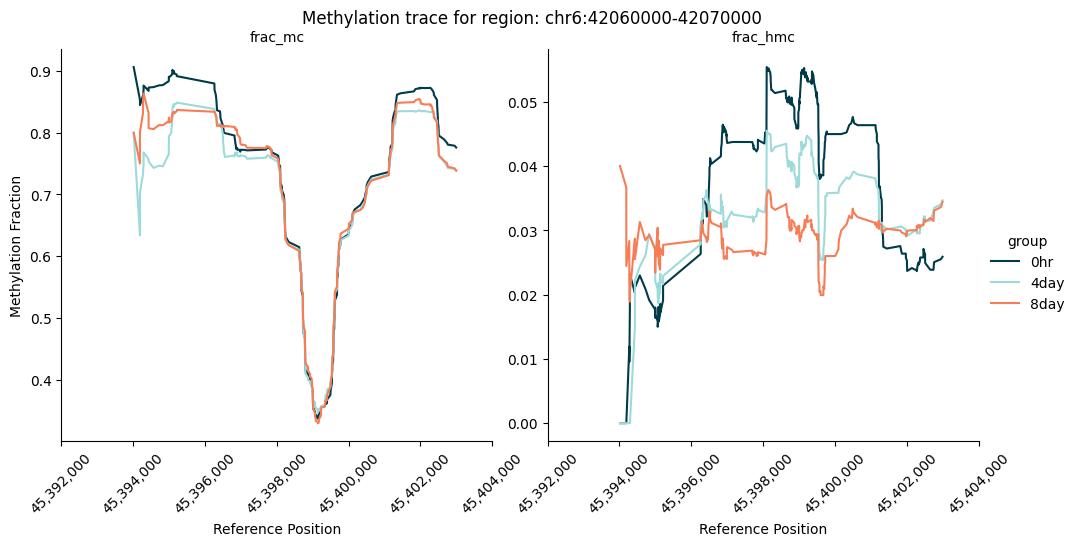

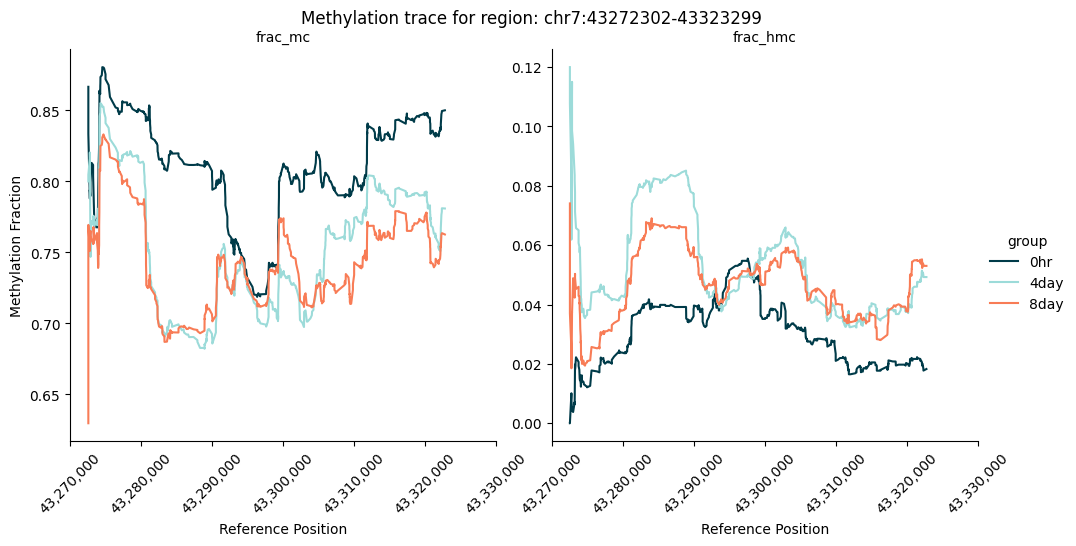

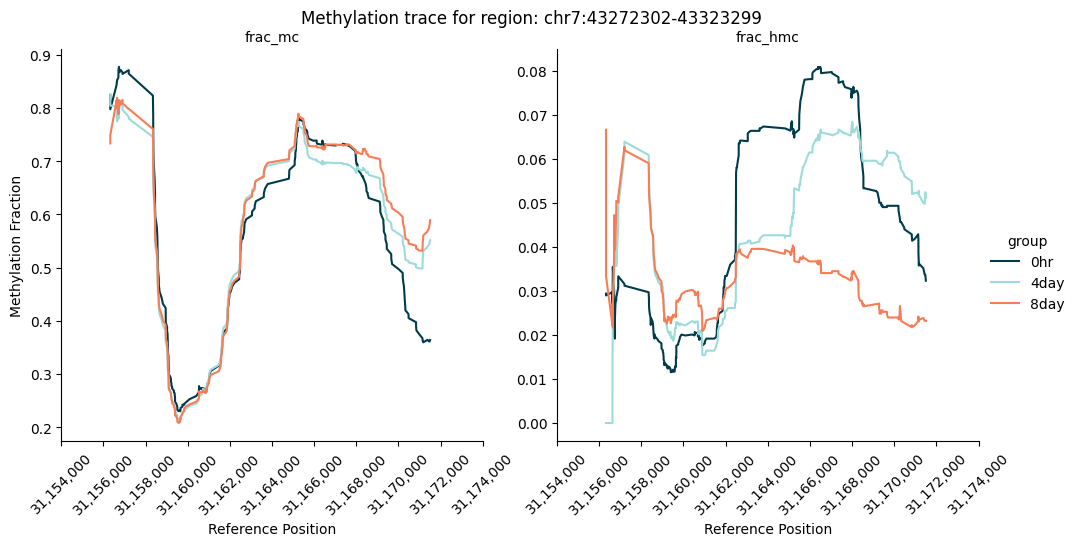

In [32]:
row1=sliced_data["inc"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr6:42060000-42070000"
)
row2=sliced_data["transient"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr7:43272302-43323299"
)
row3=sliced_data["dec"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr7:43272302-43323299"
)
row1.figure.savefig("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/methylation_traces3.pdf")


In [33]:
dynamic = pr.read_bed("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/TC_seq/peak_subset_dynamic.bed")
dynamic
regions = pd.read_table("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/chromHMM/regionlist.bed")
regions

,Chr,Start,End,peakID,Chr2.x,Start2.x,End2.x,Chrom_HMM_State.x,Type,Trend,chromHMM.x,cluster,Chr2.y,Start2.y,End2.y,Chrom_HMM_State.y,chromHMM.y
0,chr1,778344,779234,peak4,chr1,777820,779020,tss_ESC,static,static,ESC,static,chr1,777820,779020,tss_NPC,NPC
1,chr1,778344,779234,peak4,chr1,777820,779020,tss_ESC,static,static,ESC,static,chr1,779020,779220,tss_NPC,NPC
2,chr1,778344,779234,peak4,chr1,777820,779020,tss_ESC,static,static,ESC,static,chr1,779220,779820,tss_NPC,NPC
3,chr1,778344,779234,peak4,chr1,779020,779220,tss_ESC,static,static,ESC,static,chr1,777820,779020,tss_NPC,NPC
4,chr1,778344,779234,peak4,chr1,779020,779220,tss_ESC,static,static,ESC,static,chr1,779020,779220,tss_NPC,NPC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208863,chr3,156750045,156750833,peak67897,chr3,156750611,156751011,enhancer_ESC,dynamic,open,ESC,cluster7,chr3,156749611,156751811,enhancer_NPC,NPC
208864,chr5,125485270,125485656,peak78059,chr5,125485107,125485907,enhancer_ESC,dynamic,open,ESC,cluster7,chr5,125484707,125486907,enhancer_NPC,NPC
208865,chr9,72362761,72362980,peak98059,chr9,72362284,72362884,tss_ESC,dynamic,open,ESC,cluster7,chr9,72361884,72363484,enhancer_NPC,NPC
208866,chr9,72362761,72362980,peak98059,chr9,72362884,72363284,tss_ESC,dynamic,open,ESC,cluster7,chr9,72361884,72363484,enhancer_NPC,NPC


In [34]:
enhanc_torepress = regions[(regions['Chrom_HMM_State.x'] == 'enhancer_ESC') & (regions['Chrom_HMM_State.y'] == 'repressor_NPC')]
enhanc_torepress
enhanc_toenhanc = regions[(regions['Chrom_HMM_State.x'] == 'enhancer_ESC') & (regions['Chrom_HMM_State.y'] == 'enhancer_NPC')]
enhanc_toenhanc
repress_toenhanc = regions[(regions['Chrom_HMM_State.x'] == 'repressor_ESC') & (regions['Chrom_HMM_State.y'] == 'enhancer_NPC')]
repress_toenhanc
quies_toquies = regions[(regions['Chrom_HMM_State.x'] == 'quies_ESC') & (regions['Chrom_HMM_State.y'] == 'quies_NPC')]
quies_toquies

enhanc_torepress_df=pd.DataFrame(
{'Chromosome':enhanc_torepress.Chr,
 'Start': enhanc_torepress.Start,
 'End': enhanc_torepress.End,
 'Trend': enhanc_torepress.Trend}
)
enhanc_torepress_df
enhanc_torepress_p=pr.PyRanges(enhanc_torepress_df)

repress_toenhanc_df=pd.DataFrame(
{'Chromosome':repress_toenhanc.Chr,
 'Start': repress_toenhanc.Start,
 'End': repress_toenhanc.End,
 'Trend': repress_toenhanc.Trend}
)
repress_toenhanc_df
repress_toenhanc_p=pr.PyRanges(repress_toenhanc_df)
repress_toenhanc_p

,Chromosome,Start,End,Trend
0,chr1,984228,984425,static
1,chr1,2414229,2414717,static
2,chr1,3615257,3615411,static
3,chr1,3731714,3731979,static
4,chr1,6244574,6247203,static
...,...,...,...,...
1576,chr22,48919305,48919609,open
1577,chr22,22369257,22369598,open
1578,chr22,32502050,32502848,open
1579,chr22,41951772,41952409,open


In [35]:
enhanc_torepress_range = (
    enhanc_torepress_p
    .unstrand()
    .merge()
)
enhanc_torepress_range.Ranges_id = enhanc_torepress_df.Trend
repress_toenhanc_range = (
    repress_toenhanc_p
    .unstrand()
    .merge()
)


Exception: DataFrame and column must be same length.

In [36]:
ds.assign_fractions(
    numerators="num_hmc",
    denominator="num_total_c",
    min_coverage=10,
    inplace=True,
)

enhanc_torepress = ds.reduce_byranges(
    enhanc_torepress_range,
    var="frac_hmc",
)
repress_toenhanc = ds.reduce_byranges(
    repress_toenhanc_range,
    var="frac_hmc",
)
plot_df = pd.concat(
    {
        "enhanc to repress": enhanc_torepress["frac_hmc_mean"].to_dataframe().dropna(),
        "repress to enhanc": repress_toenhanc["frac_hmc_mean"].to_dataframe().dropna(),
    },
    names=["class"],
)

plot_df = plot_df.reset_index()
plot_df["sample_id_abbrev"] = plot_df.sample_id.map(lambda y: y[-3:])
plot_df

2024-05-28 14:56:25 | WARNING | [modality/contig_dataset.py:1328] Adding Ranges_id column to validate merging.


NameError: name 'repress_toenhanc_range' is not defined

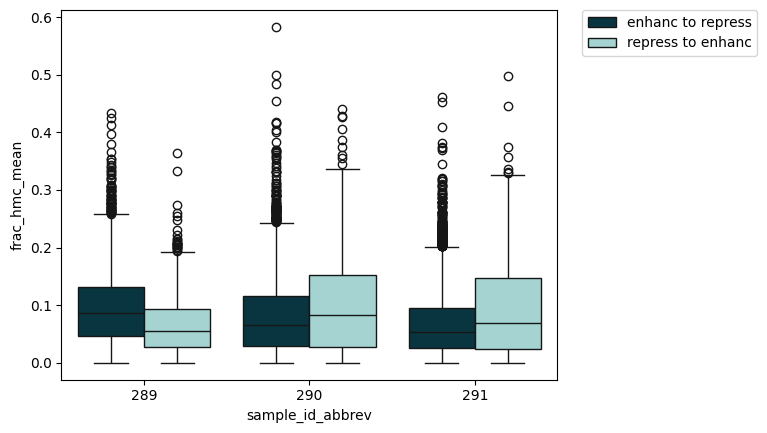

In [95]:
g = sns.boxplot(
    data=plot_df,
    y="frac_hmc_mean",
    x="sample_id_abbrev",
    hue="class",
    order=sorted(plot_df.sample_id_abbrev.unique()),
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

In [ ]:
from coda.dmr import call_vmrs, call_dmrs
#need to define as VMRs can only be calculated per chromosome
substore = ds["chr1"].copy()

# Find the regions of interest, defined as regions of variable methylation (VMRs).
roi = call_vmrs(
    ds=substore,
    count_array_name="num_modc",
    total_counts_name="num_total_c",
    store_results=True,
)

def row_to_str(row):
    return f"{row.Chromosome}:{row.Start}-{row.End}"

# Get methylation fractions
substore.assign_fractions(
    numerators="num_modc", denominator="num_total_c", min_coverage=10, inplace=True
)

In [ ]:
# Function taken from scikit-allel
# see https://github.com/cggh/scikit-allel/blob/e865e721f12e6b17cfc824bf1b95cee14c3b6afa/allel/model/ndarray.py#L3570


def locate_range(self, start=None, stop=None):
    """Locate slice of index containing all entries within `start` and
    `stop` values **inclusive**.

    Parameters
    ----------
    start : int, optional
        Start value.
    stop : int, optional
        Stop value.

    Returns
    -------
    loc : slice
        Slice object.

    Examples
    --------

    >>> import allel
    >>> idx = allel.SortedIndex([3, 6, 11, 20, 35])
    >>> loc = idx.locate_range(4, 32)
    >>> loc
    slice(1, 4, None)
    >>> idx[loc]
    <SortedIndex shape=(3,) dtype=int64>
    [6, 11, 20]

    """

    import bisect

    # locate start and stop indices
    if start is None:
        start_index = 0
    else:
        start_index = bisect.bisect_left(self, start)
    if stop is None:
        stop_index = len(self)
    else:
        stop_index = bisect.bisect_right(self, stop)

    if stop_index - start_index == 0:
        raise KeyError(start, stop)

    loc = slice(start_index, stop_index)
    return loc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2

# from sortedcontainers import SortedIndex  # Assuming SortedIndex is used in the original function


def plot_variant_locator(
    pos,
    step=None,
    ax=None,
    start=None,
    stop=None,
    flip=False,
    line_kwargs=None,
    x_formatter=None,
):
    """
    Plot lines indicating the physical genome location of variants from a
    single chromosome/contig. By default the top x axis is in variant index
    space, and the bottom x axis is in genome position space.

    Parameters
    ----------

    pos : array_like
        A sorted 1-dimensional array of genomic positions from a single
        chromosome/contig.
    step : int, optional
        Plot a line for every `step` variants.
    ax : axes, optional
        The axes on which to draw. If not provided, a new figure will be
        created.
    start : int, optional
        The start position for the region to draw.
    stop : int, optional
        The stop position for the region to draw.
    flip : bool, optional
        Flip the plot upside down.
    line_kwargs : dict-like
        Additional keyword arguments passed through to `plt.Line2D`.
    x_formatter : function, optional
        Custom formatter function for x-axis labels.

    Returns
    -------

    ax : axes
        The axes on which the plot was drawn

    """

    # check inputs
    # pos = allel.SortedIndex(pos, copy=False)
    pos = np.sort(pos)

    # set up axes
    if ax is None:
        x = plt.rcParams["figure.figsize"][0]
        y = x / 7
        fig, ax = plt.subplots(figsize=(x, y))
        fig.tight_layout()

    # determine x axis limits
    if start is None:
        start = np.min(pos)
    if stop is None:
        stop = np.max(pos)
    # loc = pos.locate_range(start, stop)
    loc = locate_range(pos, start, stop)
    pos = pos[loc]
    if step is None:
        step = len(pos) // 100
    ax.set_xlim(start, stop)

    # Set custom x-axis formatter if provided
    if x_formatter is not None:
        ax.xaxis.set_major_formatter(FuncFormatter(x_formatter))

    # plot the lines
    if line_kwargs is None:
        line_kwargs = dict()
    n_variants = len(pos)
    for i, p in enumerate(pos[::step]):
        xfrom = p
        xto = start + (i * step / n_variants) * (stop - start)
        line = plt.Line2D([xfrom, xto], [0, 1], **line_kwargs)
        ax.add_line(line)

    # invert?
    if flip:
        ax.invert_yaxis()
        ax.xaxis.tick_top()
    else:
        ax.xaxis.tick_bottom()

    # tidy up
    ax.set_yticks([])
    ax.xaxis.set_tick_params(direction="out")
    for spine in "left", "right":
        ax.spines[spine].set_visible(False)

    return ax


# Example usage with a custom formatter function:
def custom_formatter(x, pos):
    return f"{x / 1e6:.4f}M"


# pos = np.arange(0, 12000000, 1000)
# plot_variant_locator(pos, x_formatter=custom_formatter)
# plt.show()

In [37]:
def plot_fractions(store, region_string):

    ss = store[region_string]
    npos = ss.sizes["pos"]
    nsamples = ss.sizes["sample_id"]

    pos = ss.ref_position.values

    frac = ss["frac_modc"].values

    sample_ids = ss["sample_id"].values

    chi2_vals = ss["chi2_pvalue_log10"].values.reshape((-1, 1))

    fig = plt.figure(figsize=(8, 5))

    gs = fig.add_gridspec(3, 1, height_ratios=[5, 1, 1], hspace=0.1)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_facecolor("lightgrey")
    ax1.pcolormesh(frac.T, cmap=biomodal_cmap_teal.reversed())
    ax1.set_xticks([])  # Remove x ticks for ax1
    yt = np.arange(0, nsamples) + 0.5
    ax1.set_yticks(yt)  # Remove y ticks for ax1
    ax1.set_yticklabels(sample_ids)

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.set_xticks([])  # Remove x ticks for ax2
    ax2.set_yticks([])  # Remove y ticks for ax2
    ax3 = fig.add_subplot(gs[2, 0])

    vmin, vmax = chi2(df=nsamples - 1).ppf([0.001, 0.999])
    ax2.imshow(chi2_vals.T, aspect=npos / 15, cmap=biomodal_cmap, vmin=vmin, vmax=vmax)

    step = max(int(npos // 50), 1)
    plot_variant_locator(pos, step=step, ax=ax3, x_formatter=custom_formatter)
    fig.suptitle(region_string)
    plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(bottom=0.1)

In [38]:
plot_fractions(substore, row_to_str(roi.df.iloc[1]))

NameError: name 'substore' is not defined

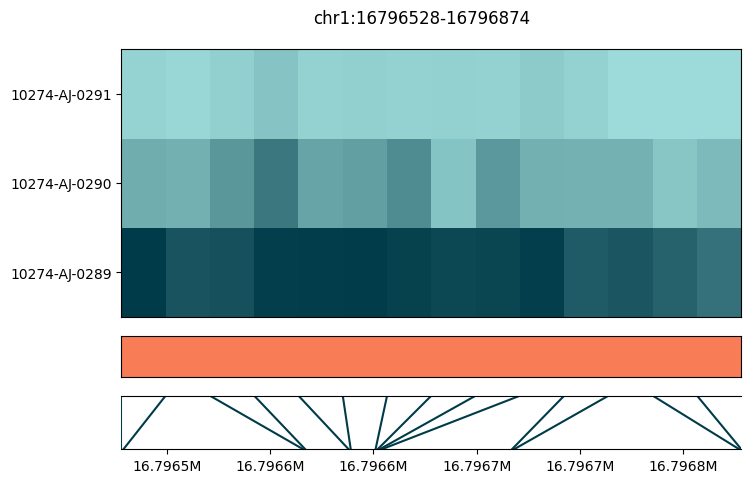

In [123]:
plot_fractions(substore, row_to_str(roi.df.iloc[0]))

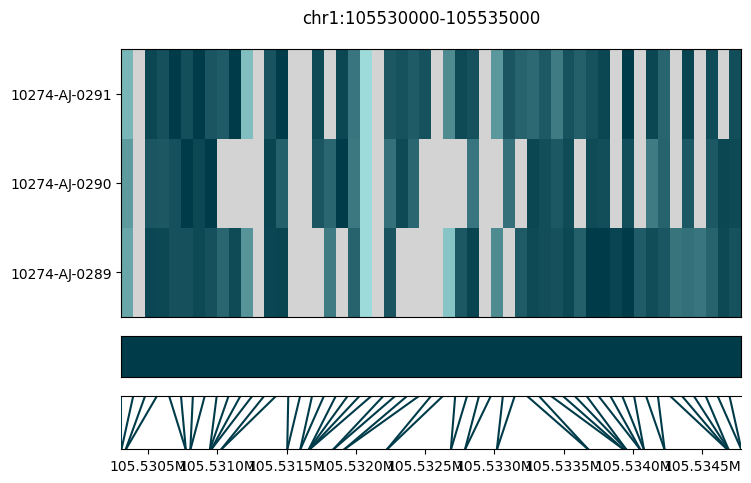

In [134]:
whole_chrom = pr.from_string(
    """
            Chromosome\tStart\tEnd
            chr1\t1\t{mm}
            """.format(
        mm=substore.ref_position[-1].values
    )
)

uninteresting = whole_chrom.subtract(roi)
ui = uninteresting.tile(5000)
plot_fractions(substore, row_to_str(ui.sample(1).df.iloc[0]))

In [136]:
# This cell calls DMRs and takes several minutes to run
dmr_regions = call_dmrs(
    ds=substore,
    count_array_name="num_modc",
    total_counts_name="num_total_c",
    condition_array_name="sample_id",
    min_pvalue=25,
    store_results=True,
)

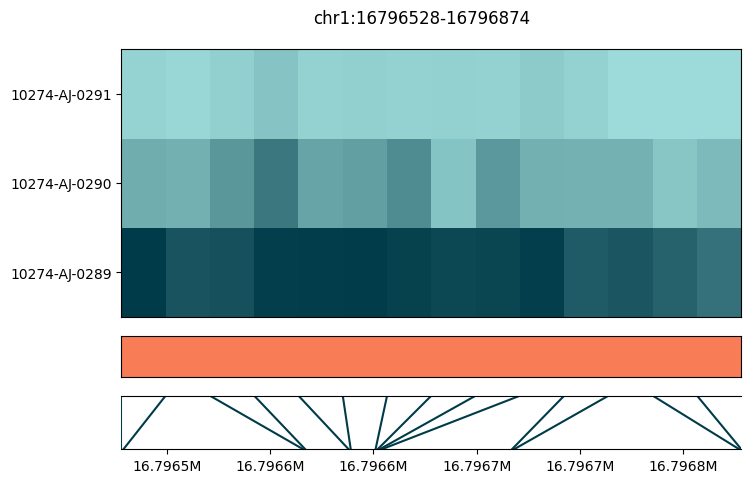

In [137]:
dmrs = dmr_regions.df.query("dmr_pvalue < 0.01")
dmrs
plot_fractions(substore, row_to_str(dmr_regions.df.iloc[0]))

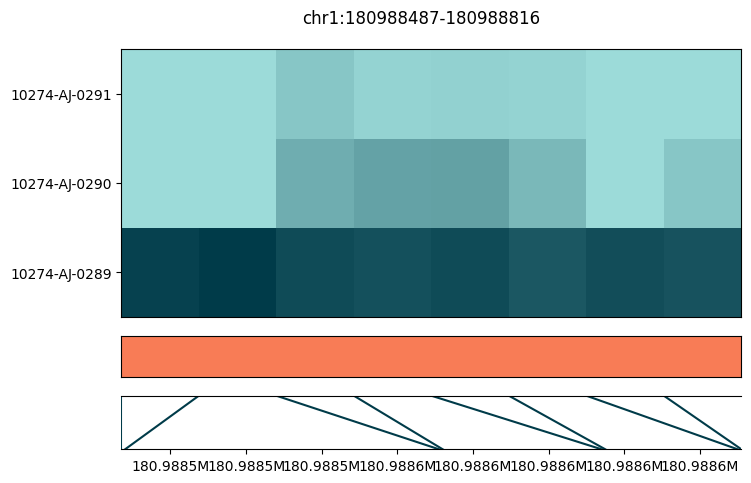

In [138]:
vmr_only = dmr_regions.df.query("dmr_pvalue > 0.5").sort_values("vmr_pvalue").head()
vmr_only
plot_fractions(substore, row_to_str(vmr_only.iloc[1]))